In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from glob import glob
import os
import numpy as np
seaborn.set_context("talk")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import pickle

2.2796322212908775
creating figure.
xray fraction: 0.143028 
 uv_fraction: 0.830137 

r_in: 17.803971 
 r_out: 1354.415129
2.2796322212908775
creating figure.
xray fraction: 0.143028 
 uv_fraction: 0.830137 



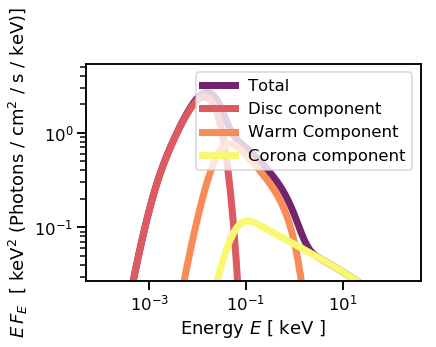

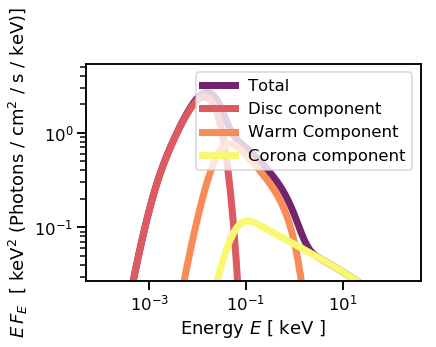

In [3]:
from qwind import wind
test = wind.Qwind(M=2e8, mdot = 0.5, modes=['custom_vel'])

# read originals

In [4]:
ORIG_DIR = "/home/arnau/Documents/qwind_original/bin64/qw"

In [5]:
orig_files = np.sort(glob(os.path.join(ORIG_DIR, "qw*")))
orig_data = []
for file in orig_files:
    data = pd.read_csv(file, sep = "\s+", skiprows=1,  names =['time', 'R', 'PHI', 'Z', 'Vz[km/s]', 'Ve[km/s]', 'fm', 'abs_uv', 'Vtot[km/s]', 'Tau_xt', 'xi_t', 'dv_dr[s]', 'd', 'tau_s', 'Fr_grav[cm/s^2]', 'fr_rad[cm/s^2]', 'L', 'Labs', 'iter', 'tau_eff','r_eff0','r_eff','tau_uv_t', 'Ir', 'Iz', 'tau_X'])
    orig_data.append(data)

# read mine

In [235]:
DATA_DIR = "/home/arnau/Documents/qwind/qwind/Results_Nomura/"
data_files = np.sort(glob(os.path.join(DATA_DIR, "line*positions*")))
data_rad_files = np.sort(glob(os.path.join(DATA_DIR, "line*rad*")))

In [236]:
my_data = []
my_rad = []
for file in data_files:
    data = pd.read_csv(file)
    my_data.append(data)
for file in data_rad_files:
    data = pd.read_csv(file)
    my_rad.append(data)

# plot

(0, 3000)

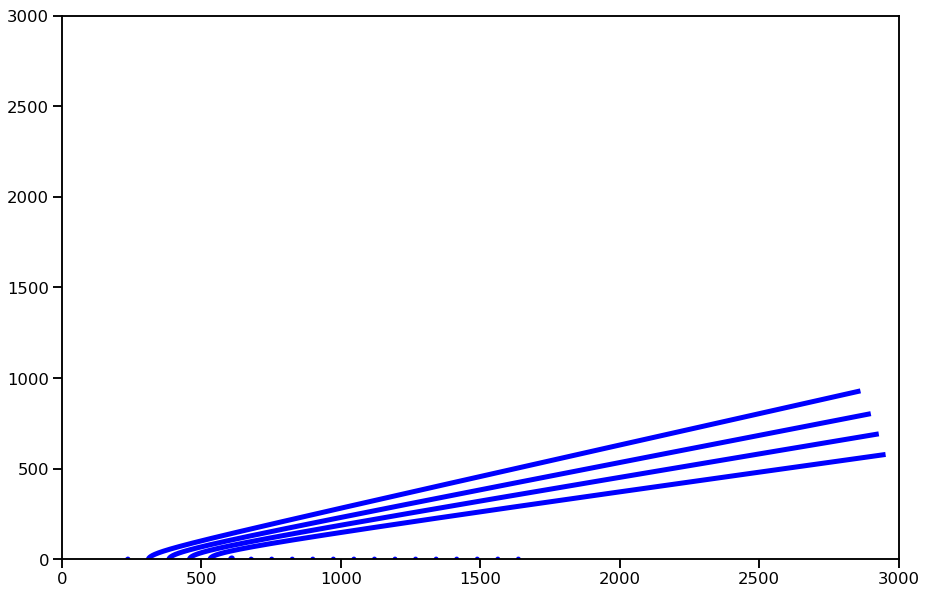

In [237]:
plt.figure(figsize=(15,10))
for line in my_data:
    plt.plot(line.R, line.Z, color = 'b', linewidth = 5)
    
#for line in orig_data:
#    plt.plot(line.R, line.Z, color = 'r')
    
plt.xlim(0,3000)
plt.ylim(0,3000)

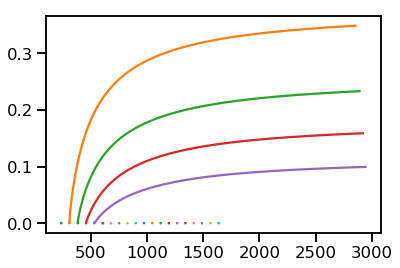

In [238]:
for line in my_data:
    plt.plot(line.R, line.V_T)

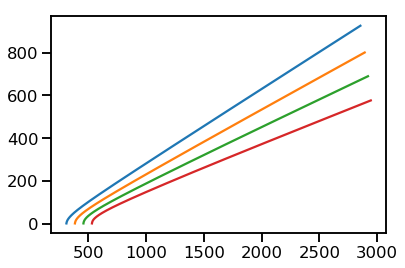

In [240]:
lines_escaped = my_data[1:5] 
for line in lines_escaped:
    plt.plot(line.R, line.Z)

In [241]:
Mdot = 0
#dR = lines_escaped[1].R[0] - lines_escaped[0].R[0]
dR = 73.684
for line in lines_escaped:
    da = 2 * np.pi * line.R[0] * dR * test.Rg**2.
    Mdot += 2 * da * 3e9 * wind.const.m_p * line.V_T[0] * wind.const.c

In [242]:
Mdot

5.144194285723665e+24

In [207]:
Mdot / wind.const.Ms * 3.154e7

0.08159434614425538

In [208]:
area = 4 * test.Rg**2 * np.pi * (400**2 - 100*2)

In [209]:
4e8 * 1e7 * 1.67e-24 * area / wind.const.Ms * 3.154e7

0.18556882258314614

# debug

In [2]:
from qwind import wind, integral, radiation, streamline, aux_numba, constants
import importlib
importlib.reload(wind)
importlib.reload(integral)
importlib.reload(radiation)
importlib.reload(aux_numba)
importlib.reload(streamline)

<module 'qwind.streamline' from '/home/arnau/Documents/qwind/qwind/streamline.py'>

2.2796322212908775
creating figure.
xray fraction: 0.143028 
 uv_fraction: 0.830137 

r_in: 200.000000 
 r_out: 1600.000000
2.2796322212908775
creating figure.
xray fraction: 0.143028 
 uv_fraction: 0.830137 



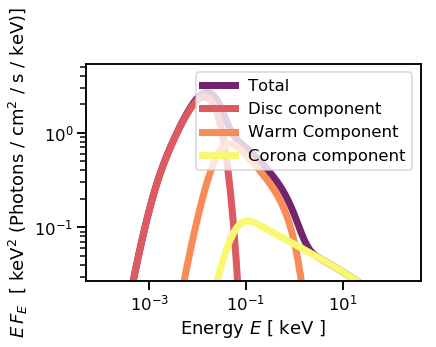

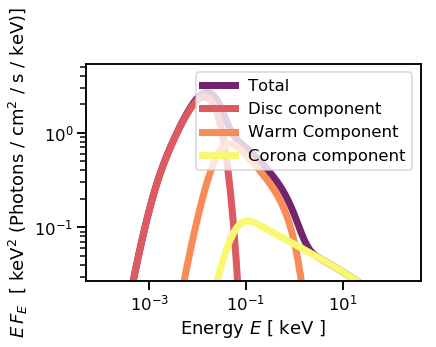

In [3]:
test = wind.Qwind(modes = ['old_integral', 'custom_vel', 'gravityonly','old_boundaries'])

In [4]:
test.lines_r_range[3]

457.89473684210526

In [5]:
line = test.line(r_0 = test.lines_r_range[3], v_z_0 = 5e7, z_0 = 1. )

In [6]:
line.iterate(50000)

Failed wind! 



In [11]:
ORIG_DIR = "/home/arnau/Documents/qwind_original/bin64/qw_grav"
orig_files = np.sort(glob(os.path.join(ORIG_DIR, "qw*")))
orig_data = []
for file in orig_files:
    data = pd.read_csv(file, sep = "\s+", skiprows=1,  names =['time', 'R', 'PHI', 'Z', 'Vz[km/s]', 'Ve[km/s]', 'fm', 'abs_uv', 'Vtot[km/s]', 'Tau_xt', 'xi_t', 'dv_dr[s]', 'd', 'tau_s', 'Fr_grav[cm/s^2]', 'fr_rad[cm/s^2]', 'L', 'Labs', 'iter', 'tau_eff','r_eff0','r_eff','tau_uv_t', 'Ir', 'Iz', 'tau_X'])
    orig_data.append(data)
    
orig_line = orig_data[3]

In [12]:
orig_line.columns

Index(['time', 'R', 'PHI', 'Z', 'Vz[km/s]', 'Ve[km/s]', 'fm', 'abs_uv', 'Vtot[km/s]', 'Tau_xt', 'xi_t', 'dv_dr[s]', 'd', 'tau_s', 'Fr_grav[cm/s^2]', 'fr_rad[cm/s^2]', 'L', 'Labs', 'iter', 'tau_eff', 'r_eff0', 'r_eff', 'tau_uv_t', 'Ir', 'Iz', 'tau_X'], dtype='object')

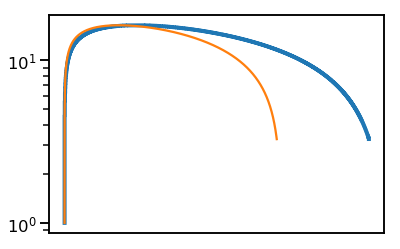

In [13]:
plt.loglog(orig_line.R, orig_line.Z, linewidth = 4)
plt.loglog(line.r_hist, line.z_hist)

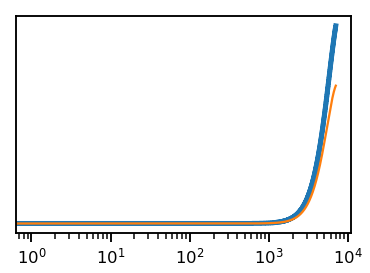

In [14]:
plt.loglog( orig_line.R, linewidth = 5)
plt.loglog(line.r_hist)
#plt.xlim(0,15000)

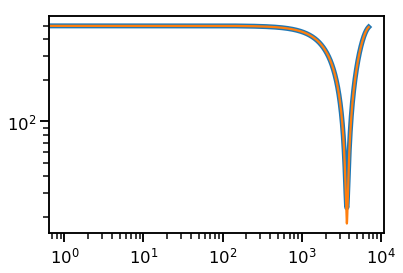

In [15]:
plt.loglog( orig_line['Vtot[km/s]'], linewidth = 5)
plt.loglog(np.array(line.v_T_hist) * constants.c / 1e5)
#plt.xlim(0,15000)

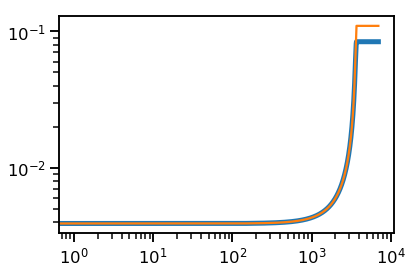

In [16]:
plt.loglog(orig_line.tau_s, linewidth = 5)
plt.loglog(line.tau_dr_hist)

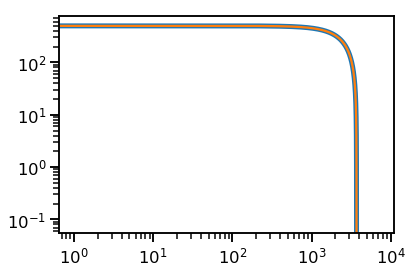

In [17]:
plt.loglog( orig_line['Vz[km/s]'], linewidth = 5)
plt.loglog( np.array(line.v_z_hist) * constants.c / 1e5)

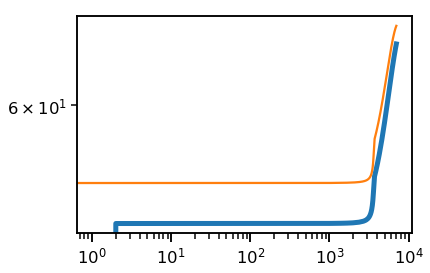

In [18]:
plt.loglog(orig_line.Tau_xt, linewidth = 5)
plt.loglog(line.tau_x_hist)

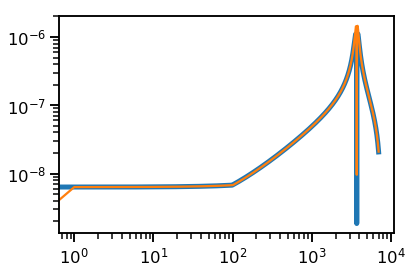

In [19]:
plt.loglog(np.abs(orig_line['dv_dr[s]']), linewidth = 5)
plt.loglog(np.abs(np.array(line.dv_dr_hist)) * constants.c / test.Rg)

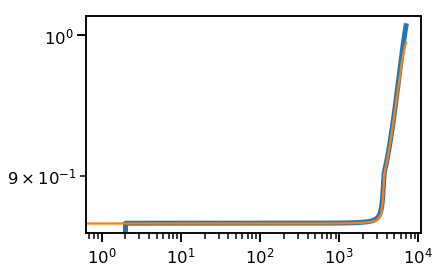

In [20]:
plt.loglog(orig_line.tau_uv_t, linewidth = 5)
plt.loglog(line.tau_uv_hist)

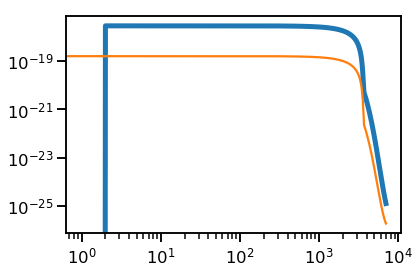

In [21]:
plt.loglog(orig_line.xi_t, linewidth = 5)
plt.loglog(line.xi_hist)

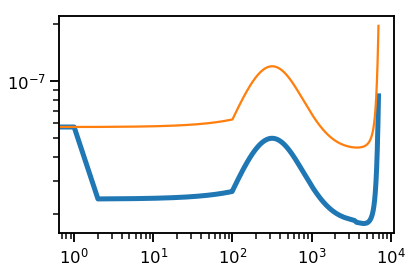

In [23]:
plt.loglog(orig_line['Iz'], linewidth = 5)
plt.loglog( np.array(test.radiation.int_hist)[:len(line.tau_uv_hist),1] )